In [23]:
import os

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [24]:
raw_data_path = '..\\data\\raw\\'

file_list = []
for file in os.listdir(raw_data_path):
    if file.endswith('.xlsx'):
        file_list.append(file)
        print(file)

Alwin_Round_1_raw_data_2019-10-21_11-2-5_sensor2.xlsx
Alwin_Round_2_raw_data_2019-10-21_11-9-2_sensor2.xlsx
Alwin_Round_3_raw_data_2019-10-21_11-16-23_sensor2.xlsx
Moon_Round_1_raw_data_2019-10-21_10-47-58_sensor2.xlsx
Moon_Round_2_raw_data_2019-10-21_10-54-30_sensor2.xlsx
Thu_Round_1_raw_data_2019-10-21_10-34-8_sensor2_Labeled.xlsx
Thu_Round_2_raw_data_2019-10-21_10-40-38_sensor2.xlsx


In [26]:
df_concated = pd.DataFrame()

In [34]:
for file_name in file_list:
    path = raw_data_path + file_name
    df_data = pd.read_excel(path)
    df_data.set_index(pd.DatetimeIndex(df_data['timestamp']),
                      inplace=True)
    
    temp_df = pd.concat((df_concated, df_data))
    df_concated = temp_df
    
    
    
    labels = df_data['label']
    unique, counts = np.unique(labels, return_counts=True)
    
    print('File: {}'.format(file_name))
    print("Unique classes: {}".format(unique))
    print('Classes distribution: {}\n'.format(dict(zip(unique, counts))))
    

File: Alwin_Round_1_raw_data_2019-10-21_11-2-5_sensor2.xlsx
Unique classes: [1 2 3 4 7 8 9]
Classes distribution: {1: 3398, 2: 4177, 3: 7200, 4: 253, 7: 393, 8: 322, 9: 219}

File: Alwin_Round_2_raw_data_2019-10-21_11-9-2_sensor2.xlsx
Unique classes: [1 2 3 4 6 7 8 9]
Classes distribution: {1: 4796, 2: 3300, 3: 7911, 4: 386, 6: 83, 7: 184, 8: 119, 9: 172}



TypeError: <class 'datetime.time'> is not convertible to datetime

In [30]:
print(df_concated.shape)
df_concated.columns
df_concated.dropna(axis=0, inplace=True)

(102483, 15)


In [31]:
print(df_concated.shape)

(102422, 15)


### Save concatenated datasets

In [33]:
df_concated.to_csv(raw_data_path + "all_datasets_combined.csv", index=False)

In [12]:
path = raw_data_path + '\Alwin_Round_1_raw_data_2019-10-21_11-2-5_sensor2.xlsx'
df_alwin_1 = pd.read_excel(path)

In [13]:
print(df_alwin_1.columns)

print(min(df_alwin_1["timestamp"]))
print(max(df_alwin_1["timestamp"]))

print(df_alwin_1["label"].value_counts())

df_alwin_1.head()

Index(['timestamp', ' sensor', ' acc_x', ' acc_y', ' acc_z', ' gyro_x',
       ' gyro_y', ' gyro_z', ' lacc_x', ' lacc_y', ' lacc_z', ' eul_x',
       ' eul_y', ' eul_z', 'label'],
      dtype='object')
2019-10-21 11:02:07.324000
2019-10-21 11:08:13.565000
3    7200
2    4177
1    3398
7     393
8     322
4     253
9     219
Name: label, dtype: int64


timestamp   sensor   acc_x   acc_y   acc_z   gyro_x   gyro_y  \
0 2019-10-21 11:02:07.324        2    0.50   -2.65    9.84    37.56   -19.50   
1 2019-10-21 11:02:07.361        2    9.40   -1.44    2.70   -15.88     6.31   
2 2019-10-21 11:02:07.361        2    9.19   -1.32    2.74   -17.12     6.81   
3 2019-10-21 11:02:07.361        2    9.03   -1.25    2.61   -19.00     7.25   
4 2019-10-21 11:02:07.412        2    8.80   -1.18    2.73   -20.37     6.87   

    gyro_z   lacc_x   lacc_y   lacc_z   eul_x   eul_y   eul_z  label  
0     6.19     0.26    -0.30     0.32  256.06    1.31   13.81      3  
1    -0.88     0.18     0.10    -0.26  237.38   69.94   27.56      3  
2    -0.06    -0.01     0.23    -0.23  237.50   69.94   27.69      3  
3     0.50    -0.16     0.32    -0.37  237.75   69.81   27.87      3  
4     0.31    -0.38     0.42    -0.27  238.06   69.69   28.06      3

C:\Users\Jakob\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


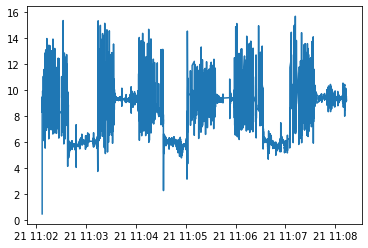

In [14]:
plt.plot(df_alwin_1["timestamp"], df_alwin_1[" acc_x"])

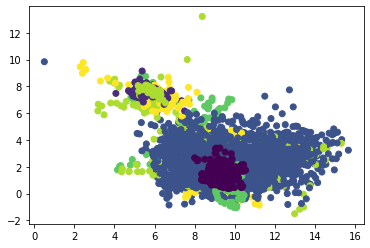

In [15]:
plt.scatter(df_alwin_1[" acc_x"], df_alwin_1[" acc_z"], c=df_alwin_1["label"] )

In [16]:
X = df_alwin_1.drop(["timestamp", "label", " sensor"], axis=1)
X.head()

acc_x   acc_y   acc_z   gyro_x   gyro_y   gyro_z   lacc_x   lacc_y  \
0    0.50   -2.65    9.84    37.56   -19.50     6.19     0.26    -0.30   
1    9.40   -1.44    2.70   -15.88     6.31    -0.88     0.18     0.10   
2    9.19   -1.32    2.74   -17.12     6.81    -0.06    -0.01     0.23   
3    9.03   -1.25    2.61   -19.00     7.25     0.50    -0.16     0.32   
4    8.80   -1.18    2.73   -20.37     6.87     0.31    -0.38     0.42   

    lacc_z   eul_x   eul_y   eul_z  
0     0.32  256.06    1.31   13.81  
1    -0.26  237.38   69.94   27.56  
2    -0.23  237.50   69.94   27.69  
3    -0.37  237.75   69.81   27.87  
4    -0.27  238.06   69.69   28.06

In [17]:
X = X.values
labels = df_alwin_1["label"].values

#### t-SNE vizualization

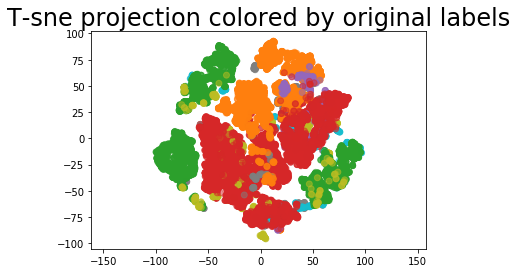

In [18]:
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 
            c=[sns.color_palette()[x] for x in labels], 
            alpha = 0.5)

plt.gca().set_aspect('equal', 'datalim')
#plt.legend(recs_predicted, predicted_classes, loc=4)
plt.title('T-sne projection colored by original labels', fontsize=24)

plt.show()

In [19]:
plt.show()